# Outlier Detection
---

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_train = pd.read_csv('train_c.csv', index_col = 0)

In [13]:
df_train.tail(-10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
10      11          20       RL    70.000000    11200   Pave      Reg   
11      12          60       RL    85.000000    11924   Pave      IR1   
12      13          20       RL    70.049958    12968   Pave      IR2   
13      14          20       RL    91.000000    10652   Pave      IR1   
14      15          20       RL    70.049958    10920   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL    62.000000     7917   Pave      Reg   
1456  1457          20       RL    85.000000    13175   Pave      Reg   
1457  1458          70       RL    66.000000     9042   Pave      Reg   
1458  1459          20       RL    68.000000     9717   Pave      Reg   
1459  1460          20       RL    75.000000     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... PoolArea MiscVal MoSold YrSold  \
10           Lvl    AllPub    Inside  ...        0       0      2   2008   
11           Lvl    AllPub    Inside  ...        0       0      7   2006   
12           Lvl    AllPub    Inside  ...        0       0      9   2008   
13           Lvl    AllPub    Inside  ...        0       0      8   2007   
14           Lvl    AllPub    Corner  ...        0       0      5   2008   
...          ...       ...       ...  ...      ...     ...    ...    ...   
1455         Lvl    AllPub    Inside  ...        0       0      8   2007   
1456         Lvl    AllPub    Inside  ...        0       0      2   2010   
1457         Lvl    AllPub    Inside  ...        0    2500      5   2010   
1458         Lvl    AllPub    Inside  ...        0       0      4   2010   
1459         Lvl    AllPub    Inside  ...        0       0      6   2008   

     SaleType SaleCondition  SalePrice  LotFrontage_missing_ind  \
10         WD        Normal     129500                        0   
11        New       Partial     345000                        0   
12         WD        Normal     144000                        1   
13        New       Partial     279500                        0   
14         WD        Normal     157000                        1   
...       ...           ...        ...                      ...   
1455       WD        Normal     175000                        0   
1456       WD        Normal     210000                        0   
1457       WD        Normal     266500                        0   
1458       WD        Normal     142125                        0   
1459       WD        Normal     147500                        0   

      MasVnrArea_missing_ind  GarageYrBlt_missing_ind  
10                         0                        0  
11                         0                        0  
12                         0                        0  
13                         0                        0  
14                         0                        0  
...                      ...                      ...  
1455                       0                        0  
1456                       0                        0  
1457                       0                        0  
1458                       0                        0  
1459                       0                        0  

[1450 rows x 79 columns]

---
### Let's check the values of our target variable together with the other numeric attributes we identified as important:
- Total BsmtSF
- GrLivArea
- OverallQual ???

1. TotalBsmtSF

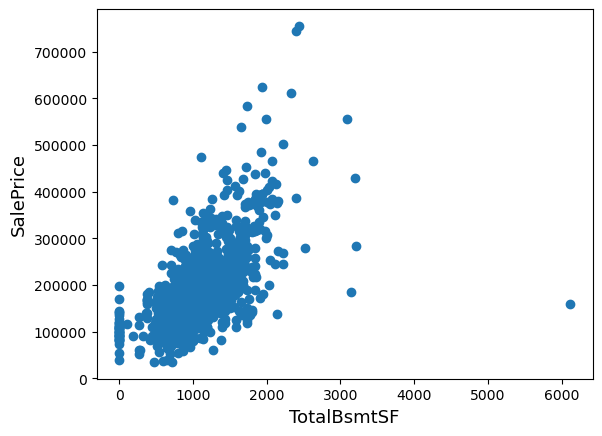

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

> We can see that there is one house with a really huge basement and but a cheap price. This house would cause problems in modelling because, except for this one house, we can see a clear linear relationship between the size of a basement and the price of a house.

> Now we are going to remove this outlier from our dataset. We will `remove all observations that have more than 5,000 square feet of basement and a price lower than $300,000:`

In [15]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)


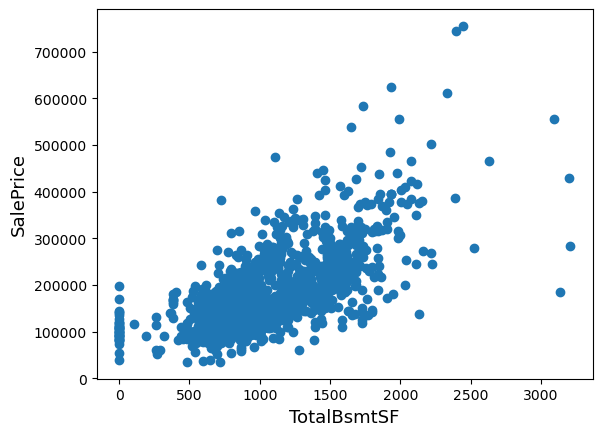

In [16]:

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

2. GrLivArea.

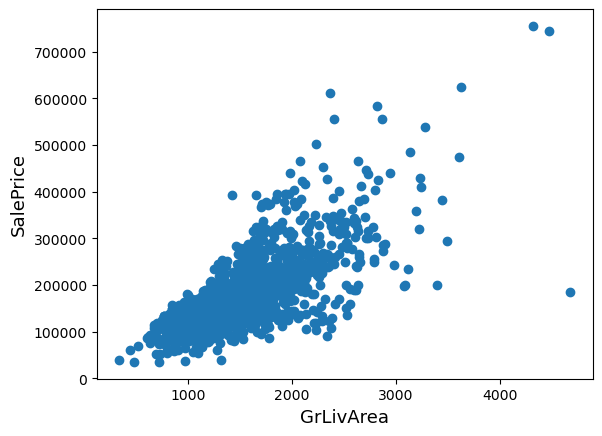

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

> This is a good example of multivariate outliers. If we look only at `GrLivArea` there are no outliers because the largest area is quite close to the second and the third largest.

> However, if we take a look at `SalePrice` together with `GrLivArea,` we can see that the price of the largest house is really small, which will again cause problems in the modelling step. Therefore we should remove this observation as well:

In [18]:
# We are dropping GrLivArea > 4000 and SalePrice <300000



df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

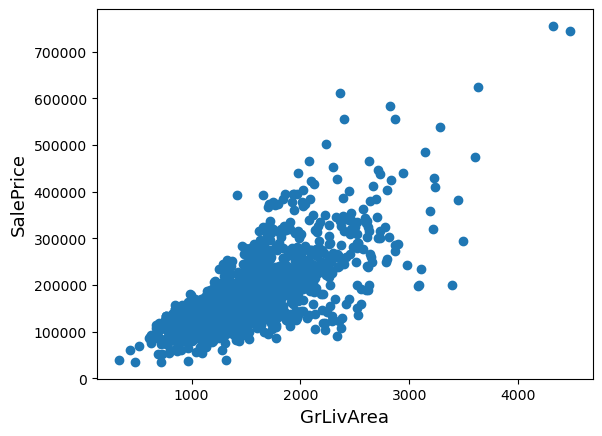

In [19]:
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

> The removal of outliers is not always safe. We decided to delete these two as they are very extreme - i.e. extremely large areas for very low prices.